In [1]:
import numpy as np                  
import pandas as pd      
import json
import platypus as plat        
from matplotlib import pyplot as plt
import pygmo as pg

In [29]:
json_file = "../MS_0_01.json" #change file name
j = json.load(open(json_file))
df = pd.json_normalize(j["data"])
df

,map-id,source,target,algorithm,front,norm-front,d-score,norm-d-score,sparsity,time
0,resources/dao-map/ost004d.map,4274,937,Apex,"[[50, 50.414, 467, 117.5, 175.5], [50, 50.414,...","[[0, 0, 0.904762, 0.934066, 0], [0, 0, 0.90476...","[517.433, 461.348, 448.782, 452.742, 540.14, 4...","[1.30041, 0.911403, 1.14286, 1.01081, 1.06837,...",26.78400,25
1,resources/dao-map/ost004d.map,3111,3309,Apex,"[[54, 54.828, 526, 106.5, 242], [54, 54.828, 5...","[[0, 0, 0.910979, 0.326923, 0.666667], [0, 0, ...","[593.721, 619.053, 554.762, 559.303, 552.995, ...","[1.17525, 1.22145, 1.06094, 1.04836, 1.09102, ...",19.42260,23
2,resources/dao-map/ost004d.map,3366,4402,Apex,"[[23, 30.038, 166, 51.5, 112], [23, 30.038, 16...","[[0, 0, 0.901639, 0.918919, 0], [0, 0, 0.90163...","[210.199, 209.877, 211.541, 206.814, 205.699, ...","[1.28739, 1.04128, 1, 0.905026, 1.25967, 0.818...",76.15020,23
3,resources/dao-map/ost004d.map,4151,4286,Apex,"[[28, 32.968, 256, 59, 134.5], [28, 32.968, 25...","[[0, 0, 0.833333, 0.586207, 0.256098], [0, 0, ...","[298.292, 306.73, 305.83, 315.522, 279.524, 27...","[1.05056, 1.00737, 1.09644, 1.058, 0.920078, 0...",16.64390,23
4,resources/dao-map/ost004d.map,3615,497,Apex,"[[45, 62.802, 401, 127, 179], [45, 62.802, 401...","[[0, 0, 0.725738, 0.538043, 0], [0, 0, 0.72573...","[463.616, 464.499, 467.848, 490.162, 512.159, ...","[0.903431, 0.829986, 0.819027, 0.906096, 1.002...",4.34104,23
...,...,...,...,...,...,...,...,...,...,...
2221,resources/dao-map/lak100d.map,38376,36140,Apex,"[[199, 218.458, 1795, 460, 791.5], [199, 218.4...","[[0, 0, 0.107477, 0.666667, 0.631579], [0, 0, ...","[2036.52, 2040.8, 2039.04, 2056.32, 2061.66, 2...","[0.924601, 0.882352, 1.0087, 0.745737, 0.71990...",6.46825,387
2222,resources/dao-map/lak100d.map,4500,11873,Apex,"[[104, 141.26, 872, 224, 424.5], [104, 141.26,...","[[0, 0, 0.631737, 0.8, 0.194444], [0, 0, 0.631...","[1010.71, 1019.25, 1025.89, 1021.02, 1026.52, ...","[1.03774, 0.986704, 1.21029, 0.870572, 1.13447...",1.76869,371
2223,resources/dao-map/lak100d.map,15863,6372,Apex,"[[193, 240.61, 1371, 374.5, 739.5], [193, 240....","[[1, 1, 0.0498221, 0.6, 0.428571], [1, 1, 0.04...","[1631.53, 1631.51, 1648.72, 1638.06, 1655.45, ...","[1.59567, 1.58217, 1.53793, 1.56266, 1.50774, ...",24.25960,361
2224,resources/dao-map/lak100d.map,23394,651,Apex,"[[265, 312.196, 2053, 550.5, 996], [265, 312.1...","[[0, 0, 0.0221402, 0.384615, 0.342857], [0, 0,...","[2382.76, 2384.27, 2384.74, 2393.58, 2408.27, ...","[0.515723, 0.462155, 0.575377, 0.421911, 0.543...",14.97130,366


In [ ]:
maps = df["map-id"].unique()

In [1]:
# front must represented a a 2d matrix
def front_hv(front):
    inver = [] # make all objective cost negative
    for row in front:
        temp_row = []
        for val in row:
            temp_row.append(-val)
    inver.append(temp_row)
    
    ref = [0] * len(front[0]) # always use reference point {0, 0, ..., 0}
    hv = pg.hypervolume(inver) #initialize hypervolume object
    # Sometimes the front is too small to use 
    try: 
        h = hv.compute(ref)
    except ValueError:
        print("no good ref point for: ")
        h = 0
        print(front)
    return h

In [ ]:
def avg_hv(df):
    for front in df["front"].tolist():
        gen_hv.append(front_hv(front))
    return np.mean(gen_hv)

In [24]:
fronts = df["front"].tolist()
hv = []
for front in fronts:
    hv.append(front_hv(front))
# discard negative

----------------------- 
 no good ref point
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]


In [25]:
print("hypervolume:")
print("map HV avg min: ", min(hv))
print("map HV avg max: ", max(hv))
print("overall HV avg: ", np.average(hv))

hypervolume:
map HV avg min:  -1
map HV avg max:  3.0163813652644148e+16
overall HV avg:  126312878037716.27


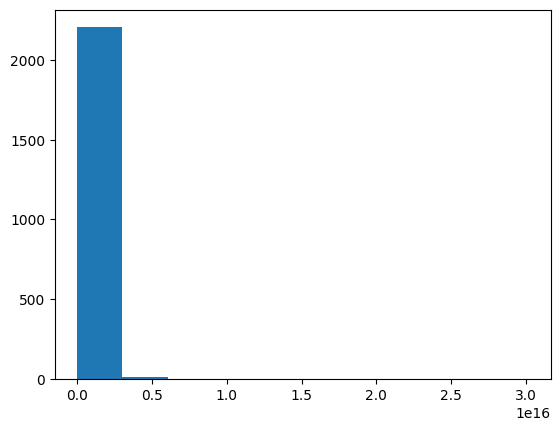

In [27]:
plt.hist(hv)
plt.show()

In [22]:
avg_map_sparsity = []
for MAP in maps:
    map_df = df[df["map-id"] == MAP]
    map_df = map_df.filter(["sparsity"])
    avg_map_sparsity.extend(map_df.mean(axis=0).tolist())

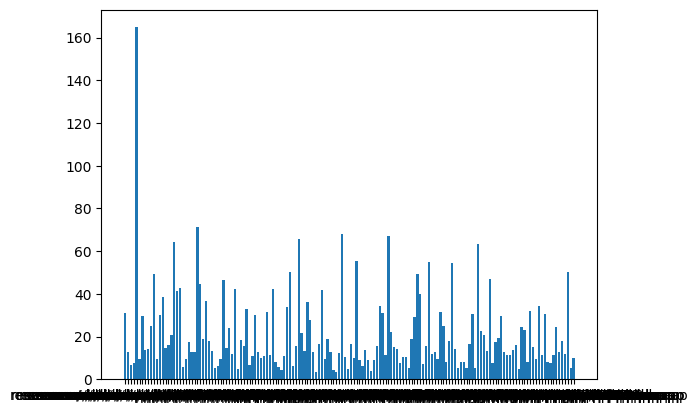

In [23]:
plt.bar(maps, avg_map_sparsity)
plt.show()